In [20]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase

### Erdos Renyi

In [32]:
rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.1

scaling = 1
# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score,scaling)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score,scaling)
end

# number of batches and MC runs
n_batch = 7;
n_rep = 2; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);

In [36]:
B = magnetic_incidence(meta_g)
W = I # weight matrix
weighted = false
if weighted
    e_weights = get_edges_prop(meta_g, :e_weight, true, 1.0)
    W *= diagm(e_weights)
end
L = B * W * B'

B_ust = magnetic_incidence_matrix(meta_g; oriented=true, phases=false)

#condL = cond(Matrix(B_ust * B_ust'))
cond(L)

11.156886361419618

In [37]:
eigvals(Matrix(B * B'))

100-element Vector{Float64}:
   9.045455387312003
  78.23088765925195
  78.87259191795387
  79.61590308834118
  80.06984442644547
  80.4084633488658
  80.74478732458215
  81.04851868036116
  81.19421248334416
  81.56036129749646
   ⋮
  98.33342825898976
  98.43483075193069
  98.61388746364645
  98.91239799444773
  99.31342401192573
  99.73672189190283
 100.06098796298262
 100.70867882706942
 100.91911784353032

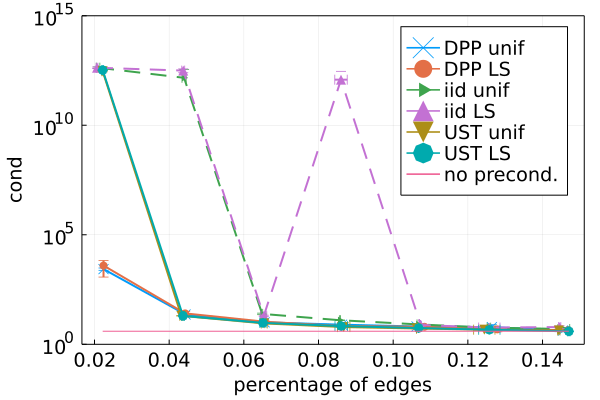

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [23]:
metric= "cond_nb" #"spear" #"tau" #"err"
y_limits = (1, 1e15)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

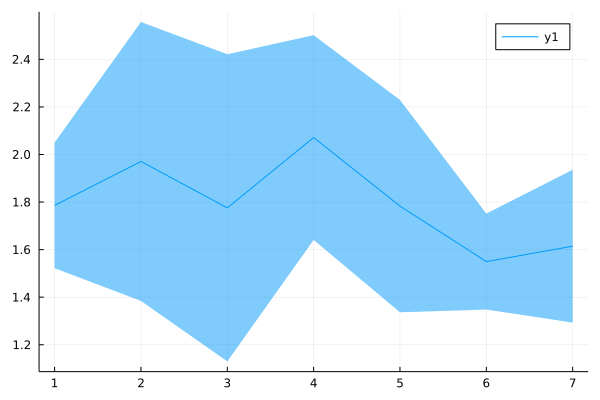

In [17]:
method = "DPP LS"
D = D_all[method]
weight = D["weight"]
weight_std = D["weight_std"]

plot(1:n_batch,weight,ribbon=weight_std)


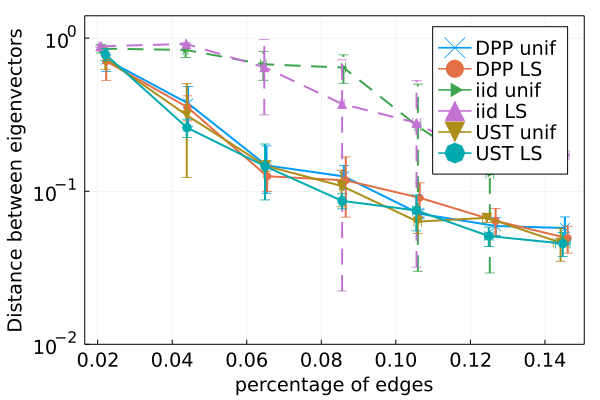

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [18]:
metric= "err" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

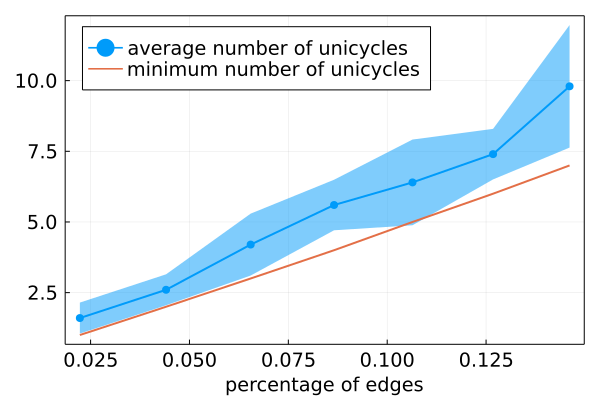

In [19]:
method = "DPP LS"
legendposition=:topleft
plot_nb_cycles(D_all,method;legendposition)

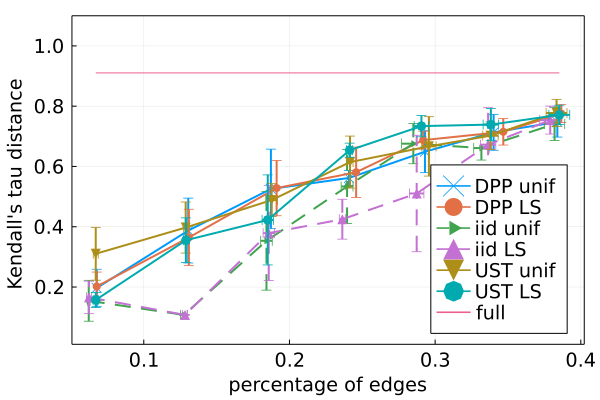

In [44]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.1)
legendposition=:bottomright
plot_comparison(metric,D_all,y_limits;legendposition)

### SBM

In [45]:
rng = Random.default_rng();

# planted ranking score
n = 100

planted_score = randperm(rng,n)
eta = 0.5
noise = 0.2
p_in = 0.8
p_out = 0.1
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)

# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);
#gplot(meta_g)

Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "iid LS"   => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "UST unif" => Dict{String, Any}("roots"=>[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],…
  "iid unif" => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "DPP LS"   => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "UST LS"   => Dict{String, Any}("roots"=>[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],…

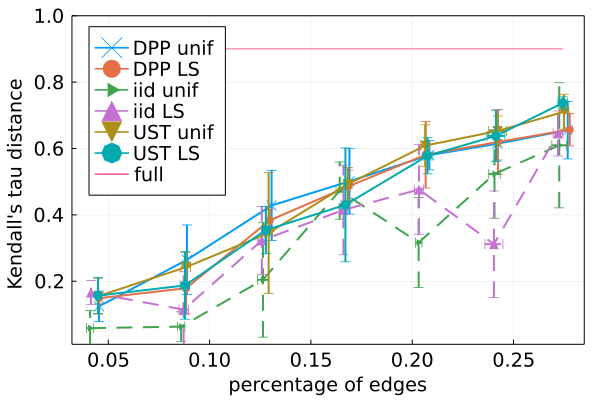

In [51]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.)
legendposition=:topleft
plot_comparison(metric,D_all,y_limits;legendposition)
